1. Use spaCy to process all cases. Split the documents into sentences and tokens. Compute number of sentences, words, and letters for each document. Report histograms for these statistics. 

In [1]:
# get permission to access drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# load the data set
import pandas as pd
import numpy as np
datapath = '/content/gdrive/My Drive/Colab Notebooks/data/'
cases = pd.read_csv(datapath + 'case_reversed.csv')
no_of_cases = 1000
random_indices = list(np.random.choice(cases.shape[0], no_of_cases, replace = False))
caseids = list(cases.iloc[random_indices]["caseid"])

In [0]:
# load the cases
import glob

text = {}
casepath = datapath + 'cases/'
for caseid in caseids:
    names = glob.glob(casepath + "*_" + caseid + ".txt")  # try to find file with particular caseid
    if len(names) > 0:  # if file exists
      filename = names[0]
      file = open(filename, mode = 'r')
      case = filename[len(casepath):-len('.txt')]  # keep year_caseid
      text[case] = file.read()
      file.close()


In [0]:
import spacy
nlp = spacy.load('en', disable=['ner'])
docs = {}
for case in text:
    docs[case] = nlp(text[case])

In [5]:
no_of_sentences, no_of_words, no_of_letters, sentences, words = {}, {}, {}, {}, {}

for case in docs:
    sentences[case] = list(docs[case].sents)
    no_of_sentences[case] = len(sentences[case])
    words[case] = [token for token in docs[case] if token.is_alpha]
    no_of_words[case] = len(words[case])
    no_of_letters_per_word = [len(word) for word in words[case]]  # assuming that symbols don't count as letters
    no_of_letters[case] = sum(no_of_letters_per_word)

[no_of_sentences, no_of_words, no_of_letters]

[{'2000_X3FJJO': 455,
  '1993_X2NL30': 565,
  '1974_X3NRF3': 65,
  '1932_X3VTF6': 96,
  '1964_X457V2': 10,
  '1989_X46C7I': 212,
  '1962_X3SBD0': 112,
  '1957_X3L9HR': 94,
  '1937_X4AMLT': 3,
  '1985_X4A8J4': 256,
  '1992_X545PI': 119,
  '2007_X176PEG003': 396,
  '1944_X3BVJV': 613,
  '1955_X3V6A9': 69,
  '1958_X44NDJ': 59,
  '1988_X469Q8': 75,
  '1933_X3ISQ4': 123,
  '1968_X427BV': 80,
  '1946_X443MU': 98,
  '1964_X3SIKO': 126,
  '1983_XABO01': 78,
  '1951_X48GS4': 15,
  '2004_XFP7J3': 141,
  '1990_X3IH96': 54,
  '1941_X47L6L': 150,
  '1955_X3V6E7': 142,
  '1971_X42E9F': 30,
  '1929_X3GGH5': 194,
  '1983_X3IVR6': 5,
  '1938_X3K1F4': 148,
  '1954_X3OK4H': 59,
  '2007_X178F7U003': 168,
  '1974_X3NQM6': 83,
  '1985_XABRBQ': 90,
  '1974_X3NQER': 223,
  '1980_X3UDO3': 179,
  '1931_X44TKJ': 57,
  '2002_XAFDRK': 207,
  '1954_X44GNB': 130,
  '1930_X3H027': 108,
  '2011_X1FLLP8003': 528,
  '1980_X3UET9': 675,
  '1986_XAFFSK': 619,
  '1968_X3T7AP': 27,
  '2009_X1B6SUE003': 80,
  '1969_X42AHG': 

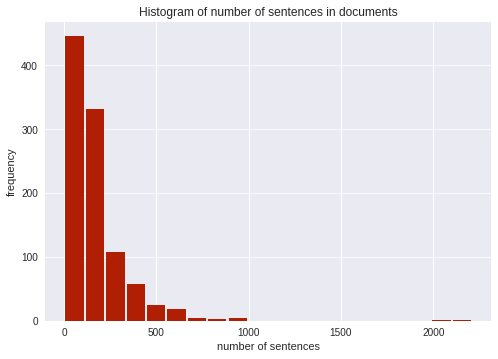

In [6]:
# make histograms
import matplotlib.pyplot as plt

sents = pd.Series(no_of_sentences)
sents.plot.hist(grid=True, bins=20, rwidth=0.9, color='#b01e04')
plt.title('Histogram of number of sentences in documents')
plt.xlabel('number of sentences')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)

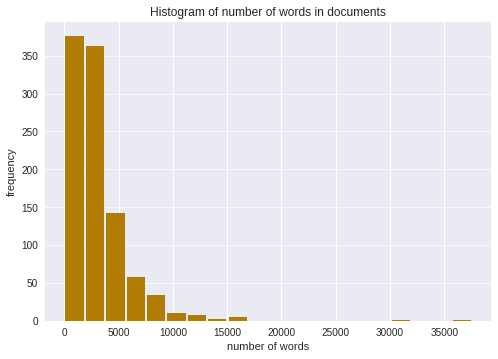

In [7]:
words_s = pd.Series(no_of_words)
words_s.plot.hist(grid=True, bins=20, rwidth=0.9, color='#b07c04')
plt.title('Histogram of number of words in documents')
plt.xlabel('number of words')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)

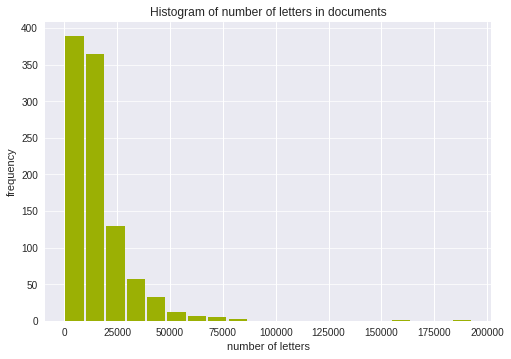

In [8]:
letters = pd.Series(no_of_letters)
letters.plot.hist(grid=True, bins=20, rwidth=0.9, color='#9bb004')
plt.title('Histogram of number of letters in documents')
plt.xlabel('number of letters')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)

2. Use the spaCy part of speech (PoS) tags to count number of nouns, verbs, and adjectives in each document. Visualize PoS frequency by year. 

In [0]:
# save part of speech tags for later
pos = {str(word).lower(): word.pos_ for word in words[case] for case in words}

In [10]:
no_of_nouns, no_of_verbs, no_of_adjectives = {}, {}, {}

for case in words:
    nouns = [word for word in words[case] if word.pos_ == 'NOUN']
    verbs = [word for word in words[case] if word.pos_ == 'VERB']
    adjectives = [word for word in words[case] if word.pos_ == 'ADJ']
    no_of_nouns[case] = len(nouns)
    no_of_verbs[case] = len(verbs)
    no_of_adjectives[case] = len(adjectives)

[no_of_nouns, no_of_verbs, no_of_adjectives]

[{'2000_X3FJJO': 1671,
  '1993_X2NL30': 2669,
  '1974_X3NRF3': 249,
  '1932_X3VTF6': 933,
  '1964_X457V2': 37,
  '1989_X46C7I': 805,
  '1962_X3SBD0': 598,
  '1957_X3L9HR': 468,
  '1937_X4AMLT': 15,
  '1985_X4A8J4': 816,
  '1992_X545PI': 522,
  '2007_X176PEG003': 1297,
  '1944_X3BVJV': 3754,
  '1955_X3V6A9': 388,
  '1958_X44NDJ': 378,
  '1988_X469Q8': 261,
  '1933_X3ISQ4': 678,
  '1968_X427BV': 396,
  '1946_X443MU': 389,
  '1964_X3SIKO': 659,
  '1983_XABO01': 292,
  '1951_X48GS4': 59,
  '2004_XFP7J3': 485,
  '1990_X3IH96': 145,
  '1941_X47L6L': 990,
  '1955_X3V6E7': 819,
  '1971_X42E9F': 82,
  '1929_X3GGH5': 975,
  '1983_X3IVR6': 24,
  '1938_X3K1F4': 1108,
  '1954_X3OK4H': 212,
  '2007_X178F7U003': 652,
  '1974_X3NQM6': 337,
  '1985_XABRBQ': 387,
  '1974_X3NQER': 868,
  '1980_X3UDO3': 635,
  '1931_X44TKJ': 253,
  '2002_XAFDRK': 1001,
  '1954_X44GNB': 668,
  '1930_X3H027': 378,
  '2011_X1FLLP8003': 1671,
  '1980_X3UET9': 2291,
  '1986_XAFFSK': 2787,
  '1968_X3T7AP': 93,
  '2009_X1B6SUE00

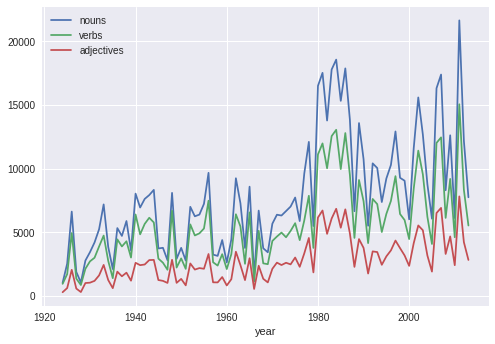

In [11]:
# plotting
data = pd.DataFrame(columns = ['year', 'nouns', 'verbs', 'adjectives'])
for case in words:
    data = data.append(pd.DataFrame([[int(case[0:4]), no_of_nouns[case], no_of_verbs[case], no_of_adjectives[case]]], 
                                    columns = ['year', 'nouns', 'verbs', 'adjectives']), ignore_index = True)

data.groupby(['year']).sum().plot()

3. Follow the steps in the lecture to normalize your corpus (e.g., removing punctuation) and discuss your choices about what information to exclude. Using the normalized tokens, make a feature set of all trigrams that end in a noun. 

In [0]:
from string import punctuation
translator = str.maketrans('','',punctuation) 

##################################################
# - we do not remove stopwords, since otherwise the trigrams are less meaningful
# - we do not stem the words, since this might change the part of speech tag (in that case, we cannot correctly find trigrams ending in a noun)
##################################################
def normalize_text(doc):
    tokens = []
    for sent in doc.sents:
        sent = str(sent)
        sent = sent.replace('\r', ' ').replace('\n', ' ')
        lower = sent.lower()  # all lower case
        nopunc = lower.translate(translator)  # remove punctuation
        words = nopunc.split()  # split into tokens
        no_numbers = [w if not w.isdigit() else '#' for w in words]  # normalize numbers
        tokens += no_numbers  # add to list of tokens for this speech
    return tokens

In [0]:
normalized = {}
for case in docs:
    normalized[case] = normalize_text(docs[case])

In [14]:
# make a feature set of all trigrams that end in a noun
import nltk
from nltk import trigrams
ends_in_noun = {}
for case in normalized:
    trigrams = list(nltk.trigrams(normalized[case]))
    ends_in_noun[case] = []
    for trigram in trigrams:
        string = " ".join(trigram)
        if trigram[2] in pos and pos[trigram[2]] == 'NOUN':
            ends_in_noun[case].append(string)
ends_in_noun

{'2000_X3FJJO': ['kansas state court',
  'testified at trial',
  'the alleged victim',
  'including the crime',
  'corrections as defendants',
  'argued that defendants',
  'fourth amendment rights',
  'the plethysmograph examination',
  'for summary judgment',
  'judgment the district',
  'the district court',
  'granted summary judgment',
  'granted summary judgment',
  'judgment to defendants',
  '# we exercise',
  'of summary judgment',
  'same legal standard',
  'by the district',
  'the district court',
  'cir1996 summary judgment',
  'the reasonable inferences',
  'any material fact',
  'entitled to judgment',
  'that no person',
  'any criminal case',
  'the supreme court',
  '# the privilege',
  'of the privilege',
  'individuals criminal trial',
  'answer official questions',
  'where the answers',
  '# the privilege',
  'two components incrimination',
  'clear whether defendants',
  'issue a incrimination',
  'incrimination the privilege',
  'guarantees every person',
  'ris

4. Make a dataframe with at least 1000 features (frequencies over trigrams ending in a noun). Standardize the features to variance one while maintaining sparsity. 

In [0]:
from collections import Counter
frequencies = {}
for case in ends_in_noun:
    to_count = (trigram for trigram in ends_in_noun[case])
    frequencies[case] = Counter(to_count).most_common()

In [0]:
# features: the trigrams that are contained in all documents, plus the top-K most common ones in any of the documents
import math
features = set()
no_of_most_common_trigrams = math.ceil(1000 / no_of_cases)  # this is the K we choose for top-K
intersection = set(map(lambda x: x[0], list(frequencies.values())[0]))  # initially contains all trigrams of arbitrary document
for case in frequencies:
    for trigram in set(map(lambda x: x[0], frequencies[case][0:min(no_of_most_common_trigrams, len(frequencies[case]))])):
        features.add(trigram)
    intersection = intersection.intersection(set(map(lambda x: x[0], frequencies[case])))
features = list(features.union(intersection))

In [0]:
df = pd.DataFrame(columns = ["case"] + features)
for case in frequencies:
    data = {}
    data["case"] = case[5:len(case)]  # now keeping only case id and throwing away year
    for feature in features:
        if feature in dict(frequencies[case]):
            data[feature] = dict(frequencies[case])[feature]
        else:
            data[feature] = 0
    df = df.append(data, ignore_index = True)

for feature in features:
    df[feature] /= np.sqrt(np.var(df[feature]))  # standardize to variance 1

In [18]:
df.head()

case of material fact the taxing authorities the civil rights  \
0  X3FJJO                0                      0                0   
1  X2NL30           2.1407                      0                0   
2  X3NRF3                0                      0                0   
3  X3VTF6                0                      0                0   
4  X457V2                0                      0                0   

  enniss naturalization authority the first jury a registered holding  \
0                               0              0                    0   
1                               0              0                    0   
2                               0              0                    0   
3                               0              0                    0   
4                               0              0                    0   

  in the court the district courts dispute resolution process  \
0            0             1.11531                          0   
1      2.05215             3.71769                          0   
2            0                   0                          0   
3            0                   0                          0   
4            0                   0                          0   

         ...        the surrounding circumstances that the car  \
0        ...                                    0            0   
1        ...                                    0            0   
2        ...                                    0            0   
3        ...                                    0            0   
4        ...                                    0            0   

  recovered a judgment for immoral purposes new york life in federal court  \
0                    0                    0             0                0   
1                    0                    0             0          3.14093   
2                    0                    0             0                0   
3                    0                    0             0                0   
4                    0                    0             0                0   

  per curiam prosecution the holy cross and the case of union officers  
0                      0              0            0                 0  
1                      0              0            0                 0  
2                      0              0            0                 0  
3                      0              0            0                 0  
4                      0              0            0                 0  

[5 rows x 378 columns]

5. Link the dataframe to the outcome **reverse**. Create a training set and a test set. Train a LogisticRegression model with default parameters to predict reversal. Compute accuracy and F1 for the prediction in the training set and in the test set. 

In [0]:
df = df.join(pd.read_csv(datapath + 'case_reversed.csv').set_index('caseid'), on='case')

In [20]:
df.head()

case of material fact the taxing authorities the civil rights  \
0  X3FJJO                0                      0                0   
1  X2NL30           2.1407                      0                0   
2  X3NRF3                0                      0                0   
3  X3VTF6                0                      0                0   
4  X457V2                0                      0                0   

  enniss naturalization authority the first jury a registered holding  \
0                               0              0                    0   
1                               0              0                    0   
2                               0              0                    0   
3                               0              0                    0   
4                               0              0                    0   

  in the court the district courts dispute resolution process      ...       \
0            0             1.11531                          0      ...        
1      2.05215             3.71769                          0      ...        
2            0                   0                          0      ...        
3            0                   0                          0      ...        
4            0                   0                          0      ...        

  that the car recovered a judgment for immoral purposes new york life  \
0            0                    0                    0             0   
1            0                    0                    0             0   
2            0                    0                    0             0   
3            0                    0                    0             0   
4            0                    0                    0             0   

  in federal court per curiam prosecution the holy cross and the case  \
0                0                      0              0            0   
1          3.14093                      0              0            0   
2                0                      0              0            0   
3                0                      0              0            0   
4                0                      0              0            0   

  of union officers case_reversed  
0                 0             1  
1                 0             1  
2                 0             1  
3                 0             1  
4                 0             1  

[5 rows x 379 columns]

In [0]:
test_indices = np.random.choice(df.shape[0], df.shape[0] // 3)  # test set contanis roughly 1/3 of data points
X_train = df.loc[[ind for ind in range(df.shape[0]) if ind not in test_indices], features]
X_test = df.loc[test_indices, features]
y_train = df.case_reversed[[ind for ind in range(df.shape[0]) if ind not in test_indices]]
y_test = df.case_reversed[test_indices]

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predictions = logreg.predict(X_test)

In [0]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)
accuracy = 1 - sum(abs(y_test - predictions)) / y_test.shape[0]

In [25]:
print(f1)
print(accuracy)

0.684326710816777
0.5705705705705706


6. Use ``GridSearchCV()`` to choose hyperparameters: L1 vs L2 penalty, and reguralization parameter _C_. Report the best model parameters and score.

In [26]:
# Grid Search
from sklearn.model_selection import GridSearchCV
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}

grid_search = GridSearchCV(logreg, grid, cv = 10)             
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(np.abs(grid_search.best_score_))

{'C': 0.001, 'penalty': 'l2'}
0.6554149085794655


7. Make a new dataframe where each sentence (of each case) is treated as a separate document. Compute vader compound sentiment scores for each sentence and report the top-10 highest- and lowest-sentiment sentences. 

In [27]:
import sys
!{sys.executable} -m pip install vaderSentiment

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [0]:
sentence_list = np.array([item for sublist in list(sentences.values()) for item in sublist])
compound_scores = np.array([analyzer.polarity_scores(x.text)["compound"] for x in sentence_list])
highest_indices = compound_scores.argsort()[-10:][::-1]
lowest_indices = compound_scores.argsort()[0:10][::1]
highest_sentiment_sentences = sentence_list[highest_indices]
lowest_sentiment_sentences = sentence_list[lowest_indices]

In [30]:
for i in range(10):
    print(str(i + 1) + ". " + str(highest_sentiment_sentences[i]) + "\n")

1. Under the terms of the residuary trust of the decedent's will, the trustee was to pay the net income to Mrs. Field for her natural life, with the right to pay to or for her benefit "such sum or sums from the principal of the trust fund and at such time or times as my said Trustee shall in its sole discretion deem wise and proper for the comfort, support, maintenance, and/or happiness of my said wife, and it is my wish and will that in the exercise of its discretion with reference to such payments from the principal of the trust fund to my said wife, May L. Field, my said Trustee shall exercise its discretion with liberality to my said wife, and consider her welfare, comfort and happiness prior to claims of residuary beneficiaries under this trust."


2. In its findings of fact and conclusions of law, the district court said: Brown vs.
Board of Education supra Considering the great number of parks, playgrounds, and recreational facilities maintained by the City of Memphis; the remark

In [31]:
for i in range(10):
    print(str(i + 1) + ". " + str(lowest_sentiment_sentences[i]) + "\n")

1. The district court's conclusion also ignores at least three aggravating circumstances present during the Sheppard murder that were not present during the Padgett murder: (1) the Sheppard murder was the third murder that day, while the Padgett murder was the first, (2) Parker cut Sheppard's throat to make sure the job was done, and (3) he murdered her to prevent her from identifying him as the murderer of Padgett.


2. After a trial lasting over ten months, the jury returned verdicts of guilty on several of the charges, including the drug conspiracy, 21 U.S.C. 846 , the RICO conspiracy, 18 U.S.C. 1962 (d), continuing criminal enterprise (Moore and Gray), 21 U.S.C. 848 (a) (b), murder, D.C.
Code 22-2401 , -3202 ; D.C.
Code 22-2101 ; 18 U.S.C. 1959 (a)(1); 21 U.S.C. 848 (e)(1)(A); 18 U.S.C., 1512 , assault with intent to murder (Moore and Gray), D.C.
Code 22-503 , -3202 , illegal use of a [**158] firearm (Moore, Gray, Raynor, Handy, and Nunn), 18 U.S.C. 924 (c), distribution of cocaine

8. Use TfIdfVectorizer to compute tf-idf frequencies for each sentence, and then compute cosine similarities between all sentences. Report example pairs of very similar sentences and very dissimilar sentences.

In [0]:
# tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=0.9,  # at most 90% of docs
                        max_features=1000,
                        stop_words='english',
                        use_idf=True,
                        ngram_range=(1,3))

sentence_list = np.random.choice(sentence_list, 2000, replace = False)  # sample 2000 sentences (otherwise cosine similarity will blow up memory)
X = tfidf.fit_transform(list(map(str, sentence_list)))

In [0]:
# compute pair-wise similarities between all sentences
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(X)

In [0]:
sim = np.tril(sim, -1)  # set all elements on or above the diagonal to zero
largest_indices = sim.argsort(axis = None)[-5:][::-1]
sim += np.diag(np.ones(sim.shape[0]))  # set all elements on the diagonal to one
smallest_indices = sim.argsort(axis = None)[0:5][::1]
similar_sentences = [(sentence_list[ind // sim.shape[0]], sentence_list[ind % sim.shape[0]]) for ind in largest_indices]
dissimilar_sentences = [(sentence_list[ind // sim.shape[0]], sentence_list[ind % sim.shape[0]]) for ind in smallest_indices]

In [35]:
print(similar_sentences)

[(Carpenter (again pro se) appealed to the Ohio Supreme Court which dismissed the appeal on April 14, 1993.
, Their appeal to the Louisiana Supreme Court presented over 100 "bills of exceptions."
), (1647 , 170 L.Ed.2d 385 (2008).
, 1843 , 152 L.Ed.2d 914 (2002)), (2620, 2633 , 57 L.Ed.2d 595 (1978).
, 118 , 1 L.Ed.2d 119 (1956).
), (1428 , 18 L.Ed.2d 527 (1967), 2777, 2789 , 53 L.Ed.2d 867 (1977);), (1602 , 80 L.Ed.2d 132 (1984), 101 , 83 L.Ed.2d 46 (1984).
)]


In [36]:
print(dissimilar_sentences)

[(App., vol. 5, at 1861.
, At that moment uh, can we stop the tape again for a second?
.
.
.
), (The revenue control limit, and hence the district support level, is calculated by adding together funds designated for transporting students to school, see ARIZ.REV.STAT.
, Id. at 310 , 104 S.Ct.), (The revenue control limit, and hence the district support level, is calculated by adding together funds designated for transporting students to school, see ARIZ.REV.STAT.
, In re Copper, 314 B.R. at 628 , and therefore that subsection 706(a) should not be construed as authorizing a largely duplicative remedy.
), (The revenue control limit, and hence the district support level, is calculated by adding together funds designated for transporting students to school, see ARIZ.REV.STAT.
, The Eleventh Circuit in Alba concluded that a similar certification requirement in Georgia did not render the inmate's state remedies ineffective because it merely placed him in "the same shoes as anyone else in Geor

9. Use _k_-means clustering to assign the sentences into 20 clusters. List 5 example sentences from each cluster. 

In [0]:
###
# K-means clustering
###
# create 20 clusters of similar documents
from sklearn.cluster import KMeans
num_clusters = 20
km = KMeans(n_clusters=num_clusters,n_jobs=-1)
km.fit(X)
clusters = km.labels_.tolist()

In [38]:
for i in range(num_clusters):
    print(np.random.choice(sentence_list[np.where(np.array(clusters) == i)], 5, replace = False))

[The Fourth Circuit concluded that the definition of "investigative files" included grand jury materials.
 The First Circuit has extended the local interest exception to hospital cost containment legislation.
 In doing so, we follow decisions by the Third and Ninth Circuit Courts of Appeals and the principles set forth in our prior cases interpreting the immigration laws.
 From our "plain reading" of the statute and review of its legislative history we conclude that the D.C.
Circuit erred in NAGCP I and III in holding that section 3622(b) requires the PRC to attribute and assign costs to the maximum extent possible using cost-of-service principles.
 Therefore, the Third Circuit concluded that pooling arrangements for extra-unit litigation should be treated like other pooling arrangements, with costs chargeable to non-members so long as they satisfied the three-part Lehnert test, including the Lehnert definition of germaneness.
]
[Mattox v. United States involved direct review of a fede